# SALES DATA ANALYSIS

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the data
data = pd.read_csv(r'\Users\DELL\Downloads\Sales Dataset.csv')


In [8]:
# Clean column names
data.columns = data.columns.str.strip().str.lower().str.replace(" ", "_")

In [18]:
# Convert date column to datetime
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')


In [20]:
# Extract month for time-based analysis
data['month'] = data['order_date'].dt.to_period('M')

In [30]:
data['DayOfWeek'] = data['order_date'].dt.day_name()

In [32]:
data['Year-Month'] = data['order_date'].dt.to_period('M').astype(str)

In [34]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("Set2")

In [40]:
print(data.columns)


Index(['order_id', 'amount', 'profit', 'quantity', 'category', 'sub-category',
       'paymentmode', 'order_date', 'customername', 'state', 'city',
       'year-month', 'month', 'DayOfWeek', 'Year-Month'],
      dtype='object')


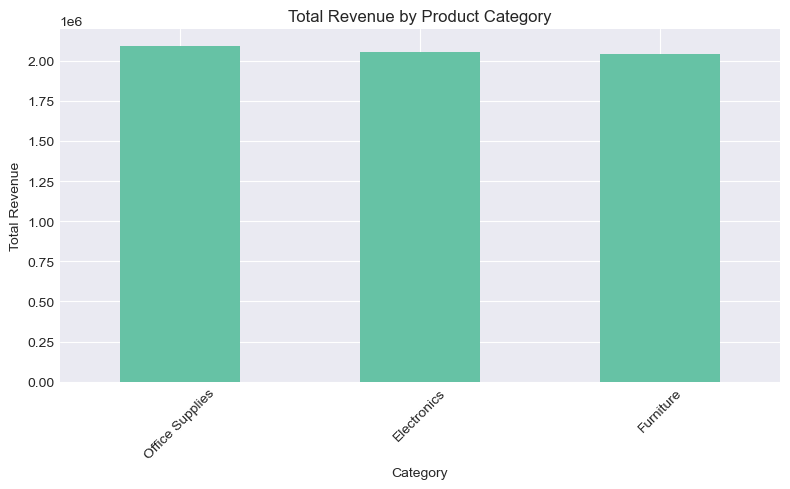

In [44]:
# 1.Total Revenue by Category
revenue_by_category = data.groupby('category')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
revenue_by_category.plot(kind='bar')
plt.title('Total Revenue by Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

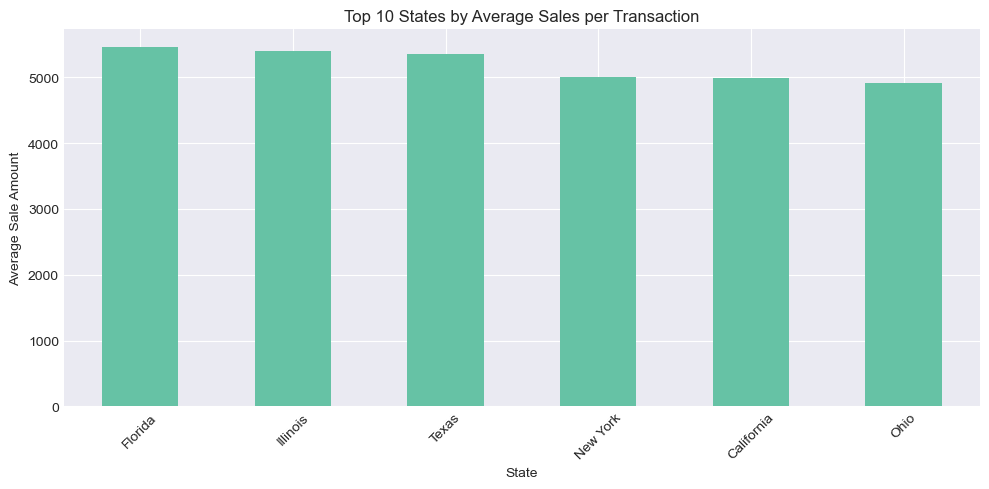

In [46]:
# 2.Average Sales per State
avg_sales_state = data.groupby('state')['amount'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
avg_sales_state.plot(kind='bar')
plt.title('Top 10 States by Average Sales per Transaction')
plt.ylabel('Average Sale Amount')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

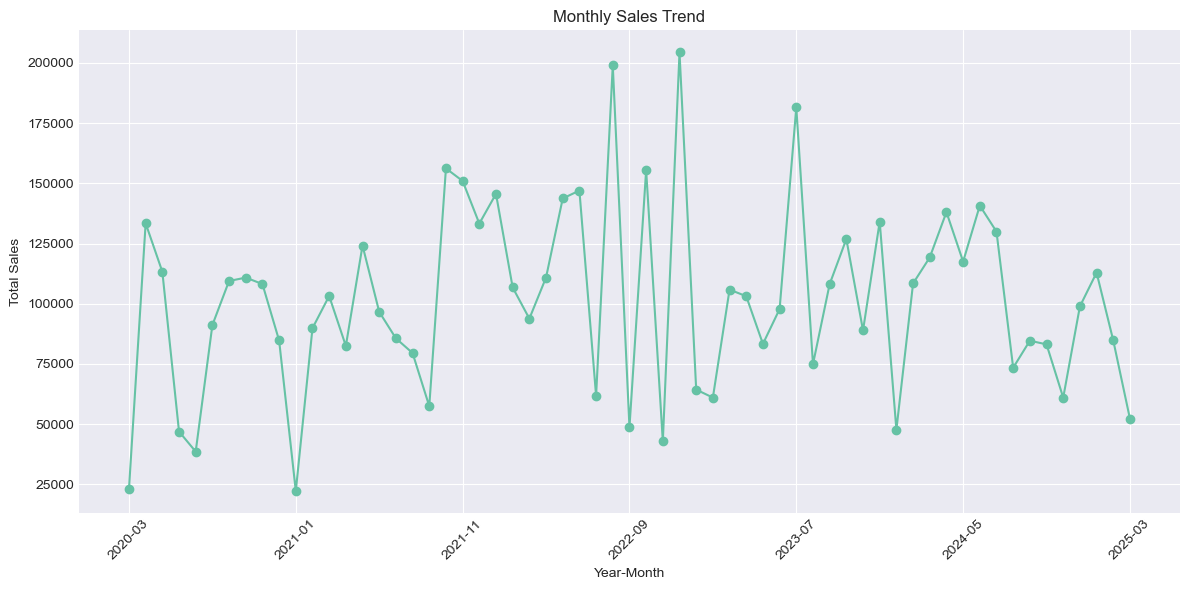

In [52]:
# 3. Monthly Sales Trend
monthly_sales = data.groupby('Year-Month')['amount'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')
plt.xlabel('Year-Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
# 4. Top 5 Best-Selling Products by Quantity and Revenue
top_quantity = data.groupby('sub-category')['quantity'].sum().sort_values(ascending=False).head(5)
top_revenue = data.groupby('sub-category')['amount'].sum().sort_values(ascending=False).head(5)
print(top_quantity)
print(top_revenue)



sub-category
Tables              1303
Sofas               1233
Electronic Games    1220
Pens                1204
Markers             1173
Name: quantity, dtype: int64
sub-category
Markers             627875
Tables              625177
Sofas               568367
Printers            566359
Electronic Games    565092
Name: amount, dtype: int64


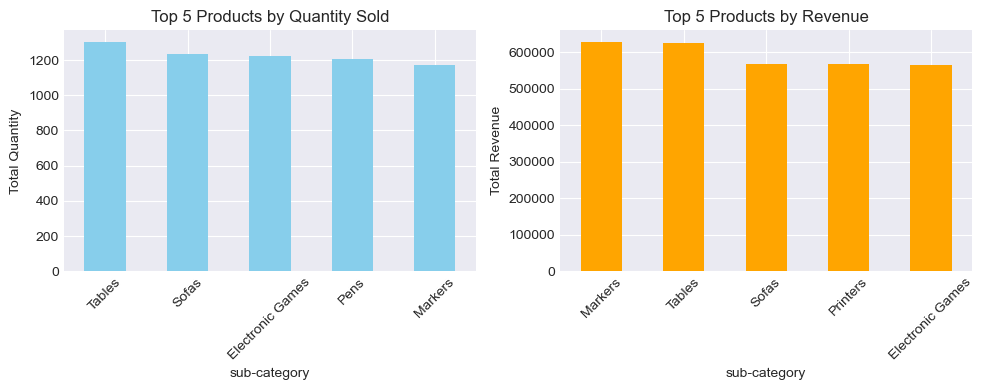

In [64]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
top_quantity.plot(kind='bar', color='skyblue')
plt.title('Top 5 Products by Quantity Sold')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
top_revenue.plot(kind='bar', color='orange')
plt.title('Top 5 Products by Revenue')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [80]:
# 5. Which products have the highest and lowest return rates?
data.groupby('sub-category')['quantity'].sum().sort_values()


sub-category
Binders              688
Chairs               875
Laptops              934
Phones               980
Paper                981
Bookcases           1030
Printers            1124
Markers             1173
Pens                1204
Electronic Games    1220
Sofas               1233
Tables              1303
Name: quantity, dtype: int64

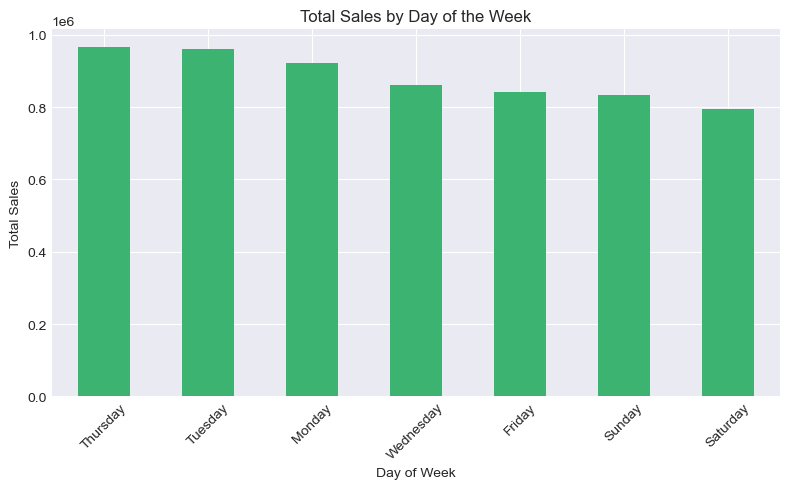

In [82]:
# 6. Sales by Day of the Week
sales_by_day = data.groupby('DayOfWeek')['amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sales_by_day.plot(kind='bar', color='mediumseagreen')
plt.title('Total Sales by Day of the Week')
plt.ylabel('Total Sales')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

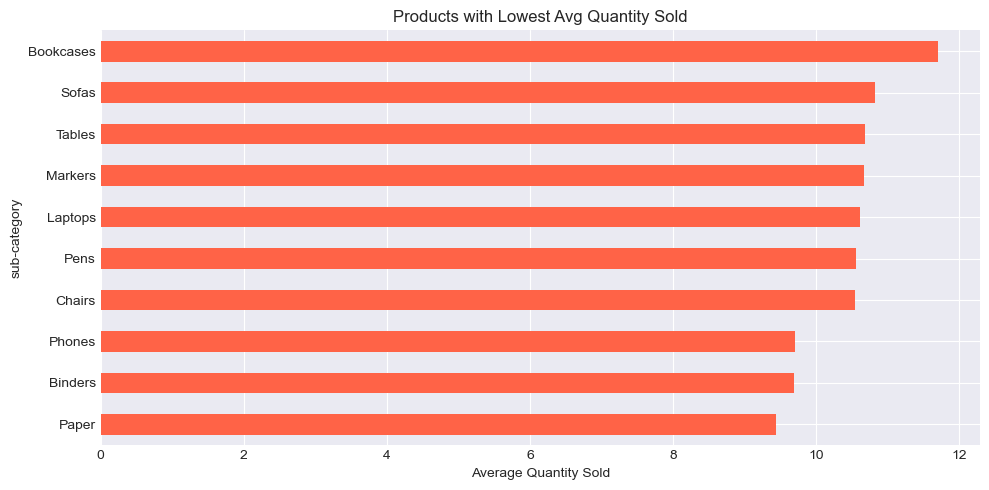

In [84]:
# 7. Products Sold in Low Quantities
low_quantity_products = data.groupby('sub-category')['quantity'].mean().sort_values().head(10)
plt.figure(figsize=(10, 5))
low_quantity_products.plot(kind='barh', color='tomato')
plt.title('Products with Lowest Avg Quantity Sold')
plt.xlabel('Average Quantity Sold')
plt.tight_layout()
plt.show()

In [90]:
# 8. Profit Margin by Sub-Category
profit_margin = data.groupby('sub-category')[['amount', 'profit']].sum()
profit_margin['Margin %'] = (profit_margin['profit'] / profit_margin['amount']) * 100
profit_margin.sort_values(by='Margin %')


,amount,profit,Margin %
sub-category,,,
Phones,503055,113607,22.583415
Pens,552269,129846,23.511369
Tables,625177,156796,25.080257
Sofas,568367,142854,25.134112
Binders,384611,97257,25.287108
Printers,566359,146259,25.824433
Laptops,419950,110260,26.255507
Electronic Games,565092,148454,26.270767
Markers,627875,174749,27.831814


C:\Users\DELL\AppData\Local\Temp\ipykernel_7828\1436362458.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Margin %', y=profit_margin.index, data=profit_margin.reset_index(), palette='coolwarm')


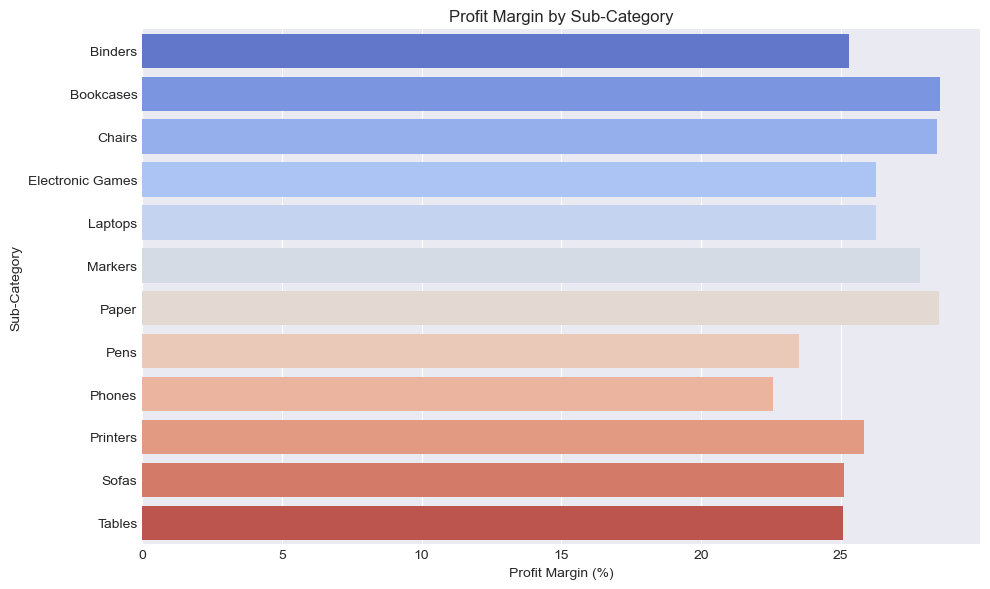

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Margin %', y=profit_margin.index, data=profit_margin.reset_index(), palette='coolwarm')
plt.title('Profit Margin by Sub-Category')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Sub-Category')
plt.tight_layout()
plt.show()